>머신러닝과 데이터분석 A-Z 올인원 패키지 Online :『고객데이터 분석 강좌』 를 참조한 notebook

# <데이터 정보>
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- Source : Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.(원문) : https://archive.ics.uci.edu/ml/datasets/Online+Retail#


# <데이터 명세>

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer resides.

-----------------------------

# 0. 기본 설정

In [43]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
import missingno as msno
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

# 1. 데이터불러오기

In [278]:
retail = pd.read_excel('./data/OnlineRetail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### ▼ 기본 조회

In [279]:
retail.info()
print(retail.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
(541909, 8)


In [280]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [281]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

-------------------------------

# 2. 데이터 전처리 (데이터 클렌징)

1. null 데이터 처리
  - CustomerID 
- Business 로직에 맞지 않은 데이터 처리
  - 음수의 아이템 수량
  - 가격이 0원 
- 데이터 타입 변경

In [282]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

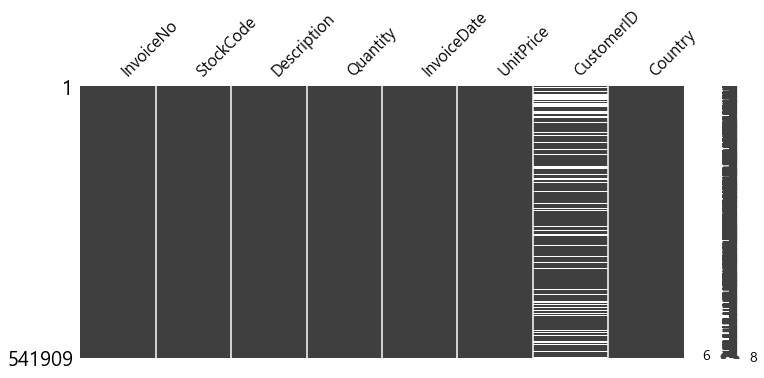

In [283]:
# 결측치 시각화 
msno.matrix(retail, figsize=(12,5))

▶ CustomerID, Description 칼럼에 많은 결측치가 존재 함

#### 1.null customerID 제거

In [284]:
# 일반적으로 많이 쓰는 dropna가 아닌 다른 방법 -> 어쨌든 결측치 있는 행은 삭제됨
retail = retail[pd.notnull(retail['CustomerID'])]
retail.shape

(406829, 8)

In [285]:
retail[pd.notnull(retail['CustomerID'])]['CustomerID'].isnull().sum()

0

#### 2. 비지니스 로직에 맞지 않은 데이터 제거

In [286]:
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]
len(retail)

397884

In [287]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [288]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### ▼데이터 타입 변경
 - 메모리 효율화
 - 올바른 데이터 타입 매칭

In [289]:
retail['CustomerID'] = retail['CustomerID'].astype(int)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [267]:
# retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']

In [268]:
# retail.to_csv('./data/OnlineRetailClean.csv')

-------------------------------

# 3. 매출 분석

#### 해당 기간 동안의 매출
 - ① 전체 매출
 - ② 국가별 매출
 - ③ 월별 매출
 - ④ 요일별 매출
 - ⑤ 시간별 매출

### ▼①전체 매출
- CheckoutPrice(총 비용 지출) = Quantity * UnitPrice    
- (근데 왜 유닛이 실수 단위냐;)

In [290]:
retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [291]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

### ▼②국가별 매출

In [292]:
CheckoutPrice_country = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
CheckoutPrice_country

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

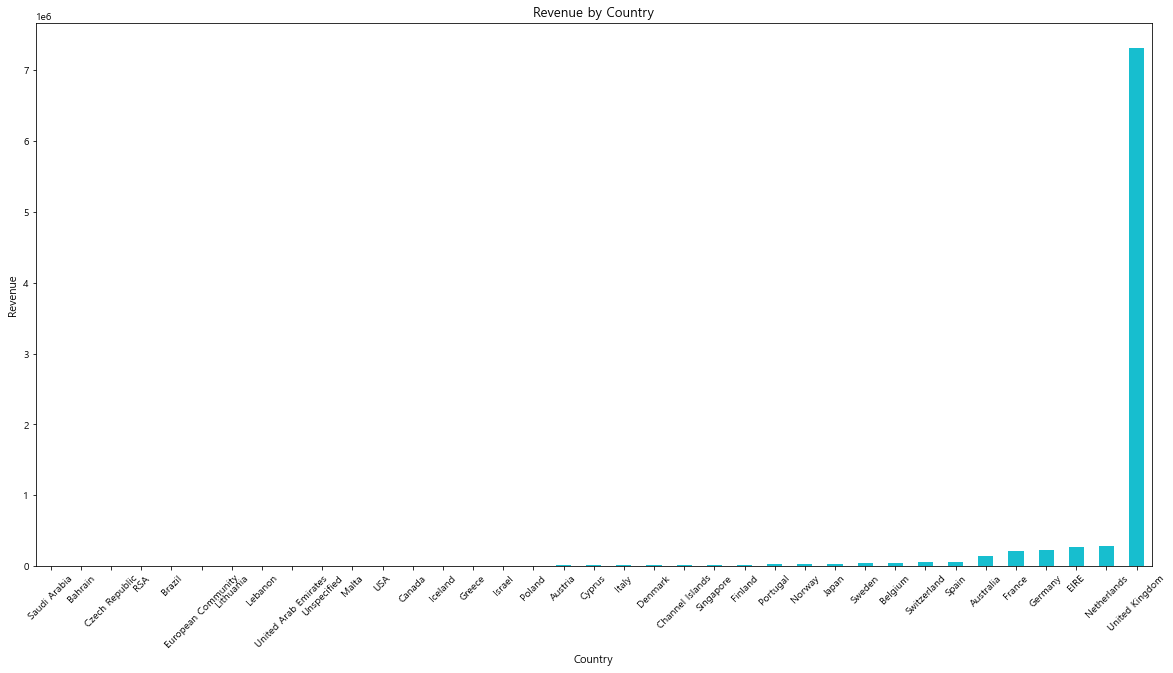

In [293]:
plot = CheckoutPrice_country.plot(kind='bar', color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=CheckoutPrice_country.index, rotation=45)
plt.show()

In [294]:
# 퍼센트로 표현
pd.DataFrame((CheckoutPrice_country / total_revenue * 100).sort_values(ascending=False))

,CheckoutPrice
Country,
United Kingdom,82.011638
Netherlands,3.203156
EIRE,2.979842
Germany,2.568249
France,2.345578
Australia,1.554427
Spain,0.690992
Switzerland,0.633390
Belgium,0.462288


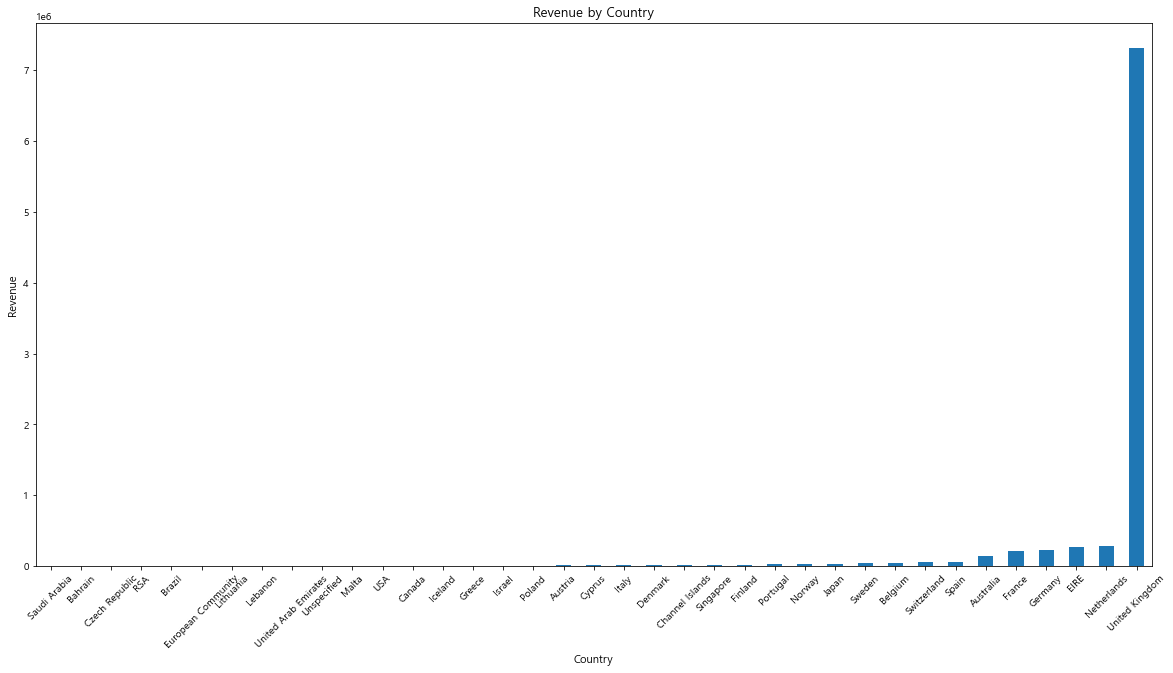

In [295]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
                   
plot_bar(CheckoutPrice_country, 'Country', 'Revenue', 'Revenue by Country')

### ▼③월별 매출

In [296]:
retail['InvoiceDate'].sort_values(ascending=False)

541908   2011-12-09 12:50:00
541900   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541896   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [297]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month 

In [298]:
# 함수 호출 말이 안된다....★★★★★★★★★★★★★★★★★★★
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

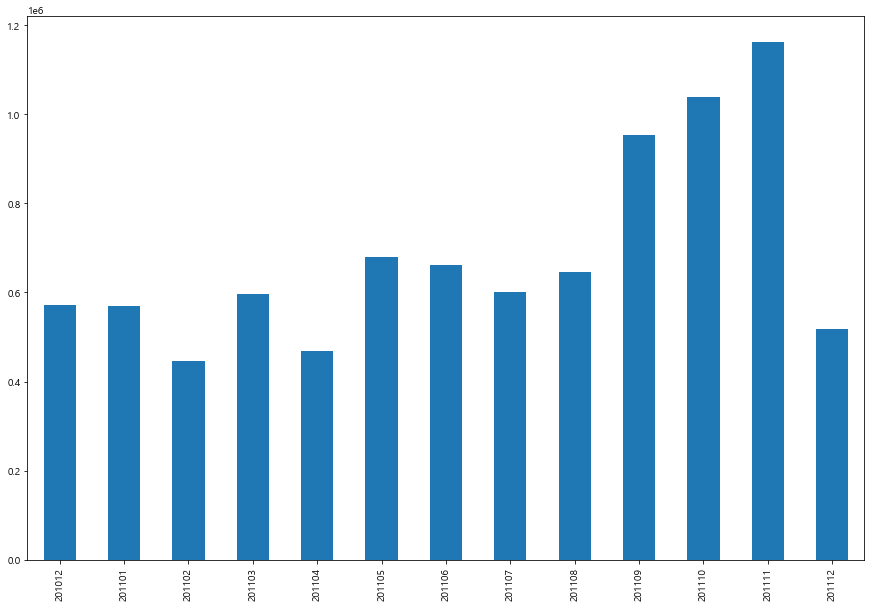

In [299]:
plt.figure(figsize=(15,10))
rev_by_month.plot.bar()

#### ▼seaborn 으로 그리기

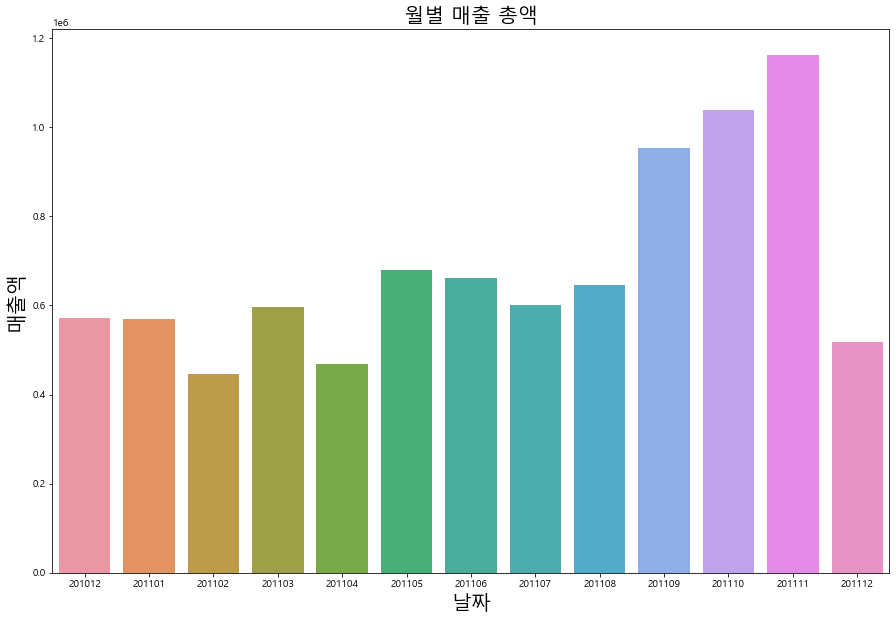

In [300]:
plt.figure(figsize=(15,10))
sns.barplot(data=pd.DataFrame(rev_by_month), x=pd.DataFrame(rev_by_month).index, y='CheckoutPrice')
plt.title('월별 매출 총액', fontsize=20)
plt.ylabel('매출액', fontsize=20)
plt.xlabel('날짜', fontsize=20)
plt.show()

#### ▼④요일별 매출

In [301]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow
# 0~6 : 월~일

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [302]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
rev_by_dow

Mon     1367146.411
Tue     1700634.631
Wed     1588336.170
Thur    1976859.070
Fri     1485917.401
Sun      792514.221
Name: CheckoutPrice, dtype: float64

In [303]:
pd.DataFrame(rev_by_dow)

,CheckoutPrice
Mon,1367146.411
Tue,1700634.631
Wed,1588336.170
Thur,1976859.070
Fri,1485917.401
Sun,792514.221


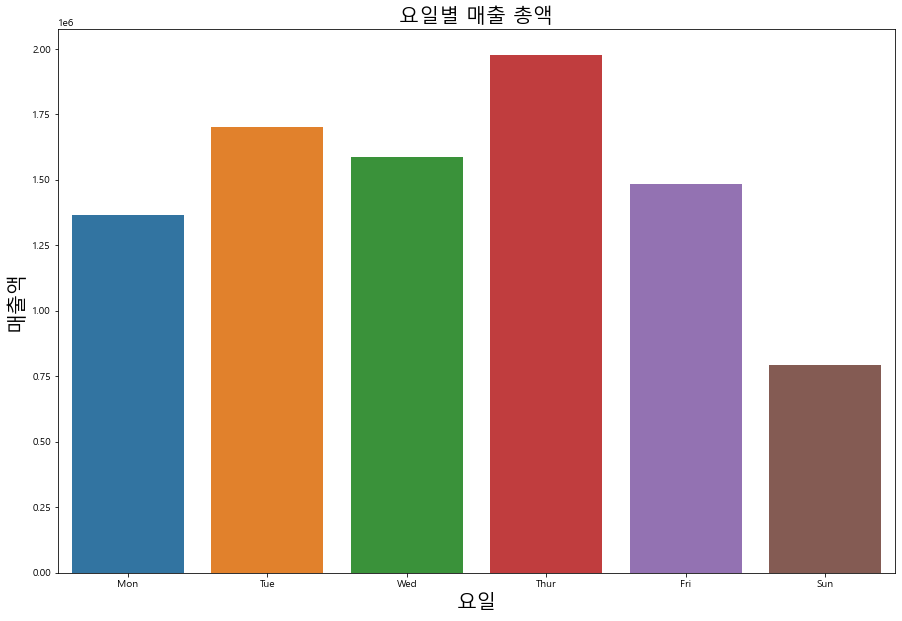

In [332]:
plt.figure(figsize=(15,10))
sns.barplot(data=pd.DataFrame(rev_by_dow), x=pd.DataFrame(rev_by_dow).index, y='CheckoutPrice')
plt.title('요일별 매출 총액', fontsize=20)
plt.ylabel('매출액', fontsize=20)
plt.xlabel('요일', fontsize=20)
# plt.xticks(pd.DataFrame(rev_by_dow).index,fontsize=20)
plt.show()

요일 추출하기

In [305]:
date = pd.DataFrame({'inputDate':['2021-01-01']}) 
date['inputDate'] = pd.to_datetime(date['inputDate']) 
date['dayOfWeek'] = date['inputDate'].dt.day_name() 
  
date 

,inputDate,dayOfWeek
0,2021-01-01,Friday


In [306]:
retail['dayOfWeek'] = retail['InvoiceDate'].dt.day_name()

In [307]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday


In [308]:
retail.groupby('dayOfWeek')['CheckoutPrice'].sum()

dayOfWeek
Friday       1485917.401
Monday       1367146.411
Sunday        792514.221
Thursday     1976859.070
Tuesday      1700634.631
Wednesday    1588336.170
Name: CheckoutPrice, dtype: float64

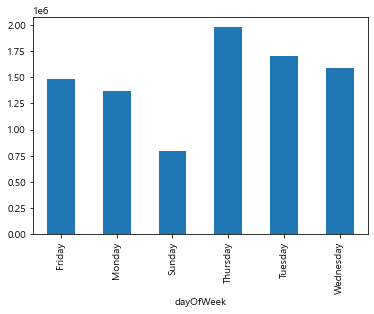

In [309]:
retail.groupby('dayOfWeek')['CheckoutPrice'].sum().plot.bar()

- ▶ 요일 알파벳순으로 정렬됨
- ▶ 아래 개선

In [310]:
retail['InvoiceDate'].dt.dayofweek 

0         2
1         2
2         2
3         2
4         2
         ..
541904    4
541905    4
541906    4
541907    4
541908    4
Name: InvoiceDate, Length: 397884, dtype: int64

In [311]:
retail_day = retail.copy()

In [312]:
retail_day['요일'] = retail_day['InvoiceDate'].dt.dayofweek 
retail_day.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek,요일
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,2


In [313]:
retail_day_rev = retail_day.groupby('요일')['CheckoutPrice'].sum()
retail_day_rev.index=['월', '화', '수', '목', '금', '일']
retail_day_rev

월    1367146.411
화    1700634.631
수    1588336.170
목    1976859.070
금    1485917.401
일     792514.221
Name: CheckoutPrice, dtype: float64

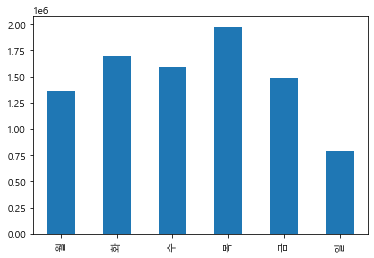

In [314]:
retail_day_rev.plot.bar()

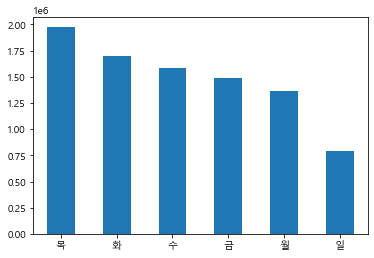

In [315]:
retail_day_rev.sort_values(ascending=False).plot.bar(rot=0)

#### ▼⑤시간별 매출

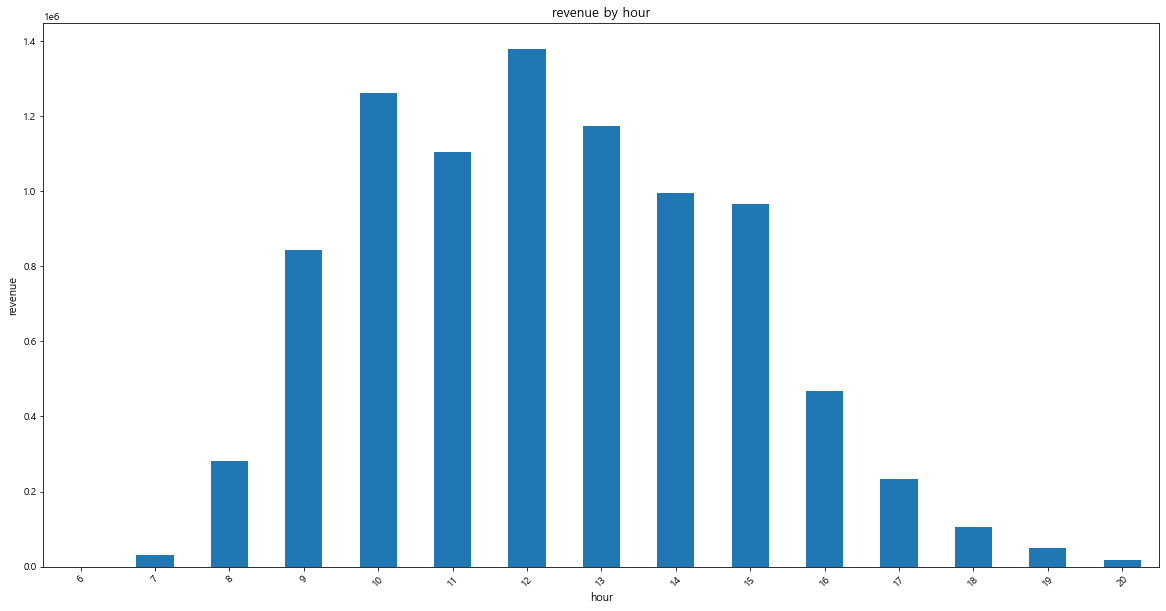

In [316]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'hour', 'revenue', 'revenue by hour')

In [317]:
rev_by_hour_frame = pd.DataFrame(rev_by_hour)
rev_by_hour_frame

,CheckoutPrice
6,4.250
7,31059.210
8,282115.630
9,842605.171
10,1261192.571
11,1104558.750
12,1378571.480
13,1173264.750
14,995629.371
15,966191.750


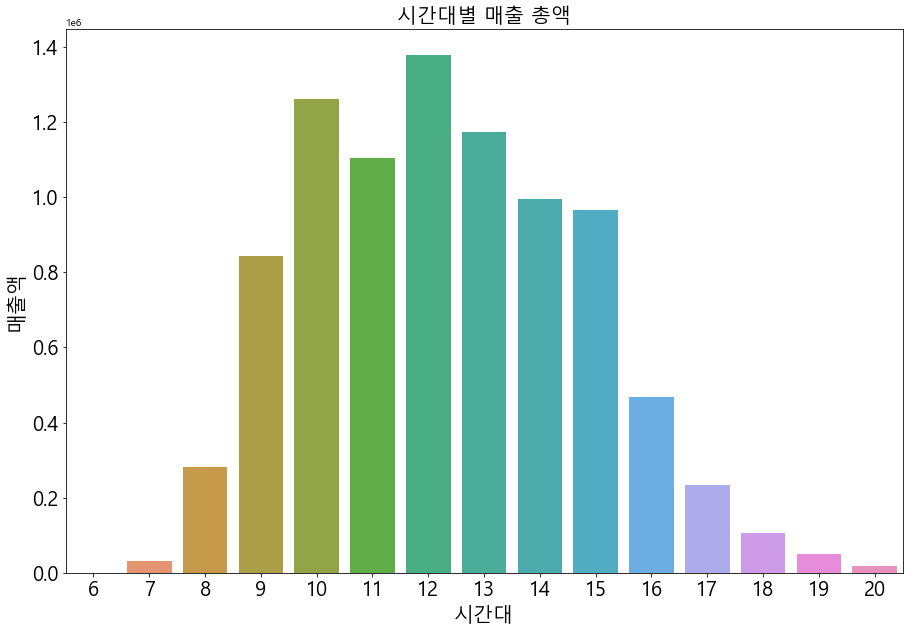

In [318]:
plt.figure(figsize=(15,10))
sns.barplot(data=rev_by_hour_frame, x=rev_by_hour_frame.index, y='CheckoutPrice')
plt.title('시간대별 매출 총액', fontsize=20)
plt.ylabel('매출액', fontsize=20)
plt.xlabel('시간대', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

--------------------

# 4. 고객 분석 : 우수고객 확인

In [319]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday


#### 우수 고객 확인
 - 구매 횟수 기준
 - 지불 금액 기준

In [320]:
retail.groupby('CustomerID').count().head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CheckoutPrice,dayOfWeek
CustomerID,,,,,,,,,
12346,1,1,1,1,1,1,1,1,1
12347,182,182,182,182,182,182,182,182,182
12348,31,31,31,31,31,31,31,31,31
12349,73,73,73,73,73,73,73,73,73
12350,17,17,17,17,17,17,17,17,17


In [321]:
retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
15823       1
15802       1
15753       1
15668       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [322]:
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

### ▼ 최초 구매 연월 파악

In [347]:
# ★★★★★★★★
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)  #연,월,일 출력 일은 항상 1로 출력 

In [348]:
# ★★★★★★★★  합수 적용 방식
retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,2010-12-01


In [351]:
month_group = retail.groupby('CustomerID')['Month']
month_group.head()

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541768   2011-12-01
541769   2011-12-01
541770   2011-12-01
541771   2011-12-01
541772   2011-12-01
Name: Month, Length: 21088, dtype: datetime64[ns]

In [352]:
month_group.transform(np.min)

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: Month, Length: 397884, dtype: datetime64[ns]

In [353]:
retail['MonthStarted'] = month_group.transform(np.min)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek,Month,MonthStarted
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Friday,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Friday,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Friday,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Friday,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,Friday,2011-12-01,2011-08-01


In [354]:
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + \
    (retail['Month'].dt.month - retail['MonthStarted'].dt.month)

In [376]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,dayOfWeek,Month,MonthStarted,MonthPassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,2010-12-01,2010-12-01,0


In [381]:
def get_unique_no(x):
    return len(np.unique(x))

cohort_group = retail.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_no).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [385]:
cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')
cohort_df.head()

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN

In [387]:
customer_cohort = cohort_df.div(cohort_df.iloc[:, 0], axis=0) * 100  #div:첫 열에 대한 행단위 연산
customer_cohort = customer_cohort.round(decimals=2)
# customer_cohort = round(customer_cohort,2)

customer_cohort

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

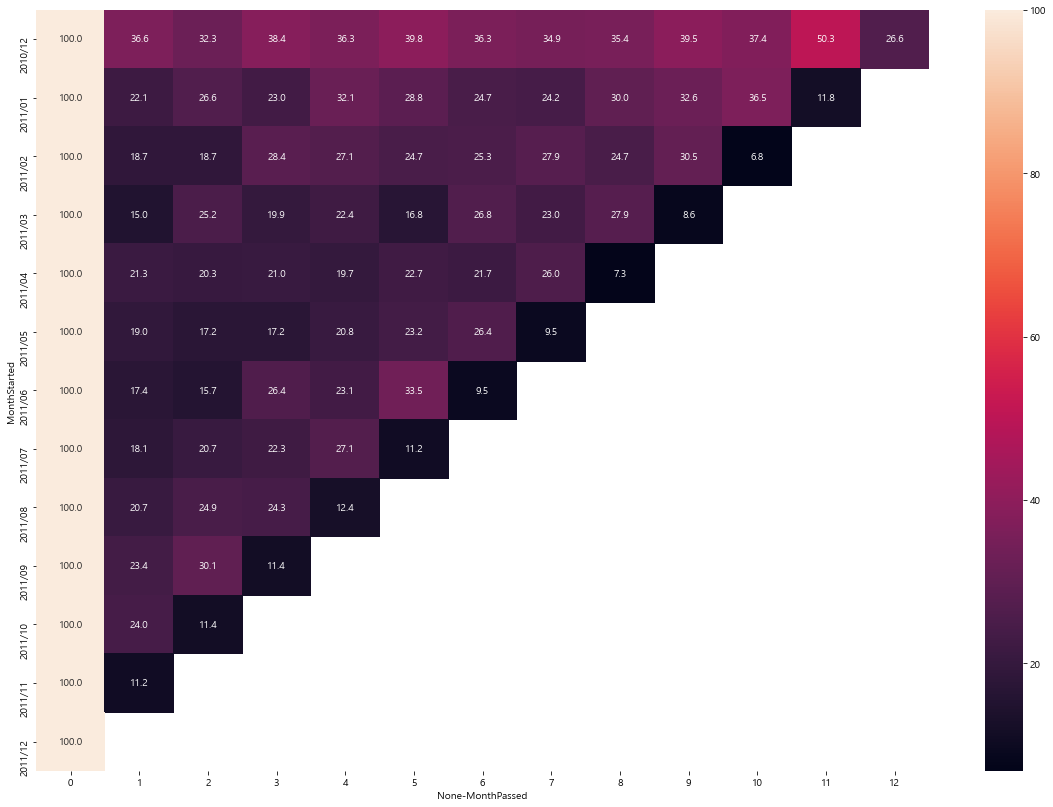

In [392]:
xticks = np.arange(0, 13)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11', '2011/12']

plt.figure(figsize = (20, 14))
sns.heatmap(customer_cohort, 
            annot=True, 
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.1f')